#  Example of using Symbolic regression

https://github.com/MilesCranmer/PySR

This is an example of using test data with a knon function with some randon numbers

$$
y(x) =  2.5382 cos(x) + x^2 - 0.5 
$$


The function is evaluated over some random points x.

The test is whether the symbolic regressio library can reproduce the input function


In [2]:
import numpy as np

X = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(X[:, 3]) + X[:, 3] ** 2 - 0.5

In [3]:
print(y.shape)
print(X.shape)

(100,)
(100, 5)


Text(0, 0.5, 'y')

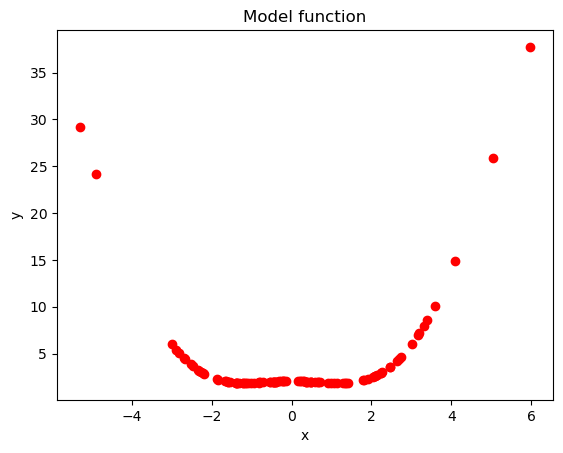

In [4]:
import matplotlib.pyplot as plt
plt.plot(X[:,3],y, "ro")
plt.title("Model function")
plt.xlabel("x")
plt.ylabel("y")


# Run the symbolic regression code

https://pypi.org/project/pysr/

The pysr module needs to be installed


In [5]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [6]:
model.fit(X, y)

/home/cmcneile/anaconda3/envs/symbol_regress/lib/python3.11/site-packages/pysr/sr.py:1276: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


/home/cmcneile/anaconda3/envs/symbol_regress/lib/python3.11/site-packages/pysr/julia_helpers.py:217: UserWarning: Your system's Python library is static (e.g., conda), so precompilation will be turned off. For a dynamic library, try using `pyenv` and installing with `--enable-shared`: https://github.com/pyenv/pyenv/blob/master/plugins/python-build/README.md#building-with---enable-shared.
  warnings.warn(



Expressions evaluated per second: 2.290e+05
Head worker occupation: 7.9%
Progress: 509 / 600 total iterations (84.833%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           3.161e+01  1.594e+01  y = 3.9437
3           3.245e+00  1.138e+00  y = (x₃ * x₃)
5           2.811e+00  7.177e-02  y = ((x₃ * 0.90995) * x₃)
6           1.261e+00  8.013e-01  y = (cos(x₃) + (x₃ * x₃))
8           2.398e-01  8.301e-01  y = ((cos(x₃) * 2.3984) + (x₃ * x₃))
10          3.620e-13  7.971e+00  y = (((x₃ * x₃) + (cos(x₃) * 2.5382)) + -0.5)
19          1.818e-13  7.654e-02  y = ((((x₃ * x₃) + -1.2543) + (cos(x₃) * 2.5382)) + (sin(sin(i...
                                  nv(exp(inv(-31.004))))) + -0.0027598))
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.


[ Info: Started!


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          3.9436998   
	1         1.138218                                          (x3 * x3)   
	2         0.071767                           ((x3 * 0.90995187) * x3)   
	3         0.801340                              (cos(x3) + (x3 * x3))   
	4         0.830119                ((cos(x3) * 2.3984063) + (x3 * x3))   
	5        13.609640          (((x3 * x3) + (cos(x3) * 2.5382)) + -0.5)   
	6         0.023204  ((((x3 * x3) + -1.3351032) + (cos(x3) * 2.5382...   
	7  >>>>   0.143205  ((((x3 * x3) + -1.2542515) + (cos(x3) * 2.5382...   
	
	           loss  complexity  
	0  3.161265e+01           1  
	1  3.245020e+00           3  
	2  2.811134e+00           5  
	3  1.261432e+00           6  
	4  2.397904e-01           8  
	5  3.619505e-13          10  
	6  3.223022e-13          15  
	7  1.817568e-13          19  
]

In [7]:
print(model)

PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                          3.9436998   
	1         1.138218                                          (x3 * x3)   
	2         0.071767                           ((x3 * 0.90995187) * x3)   
	3         0.801340                              (cos(x3) + (x3 * x3))   
	4         0.830119                ((cos(x3) * 2.3984063) + (x3 * x3))   
	5        13.609640          (((x3 * x3) + (cos(x3) * 2.5382)) + -0.5)   
	6         0.023204  ((((x3 * x3) + -1.3351032) + (cos(x3) * 2.5382...   
	7  >>>>   0.143205  ((((x3 * x3) + -1.2542515) + (cos(x3) * 2.5382...   
	
	           loss  complexity  
	0  3.161265e+01           1  
	1  3.245020e+00           3  
	2  2.811134e+00           5  
	3  1.261432e+00           6  
	4  2.397904e-01           8  
	5  3.619505e-13          10  
	6  3.223022e-13          15  
	7  1.817568e-13          19  
]


## introduce some random noise

* we want to investigate how stable the symbolic regression is when some noise is added

In [10]:
# 10 percent random noise
noise_amp = 0.1

In [15]:

noise = np.random.randn(100) * noise_amp

In [18]:
import numpy as np

X_noise = 2 * np.random.randn(100,5)
y_noise = 2.5382 * np.cos(X_noise[:, 3]) + X_noise[:, 3] ** 2 - 0.5 
y_noise = (1 + noise ) * y_noise

Text(0, 0.5, 'y')

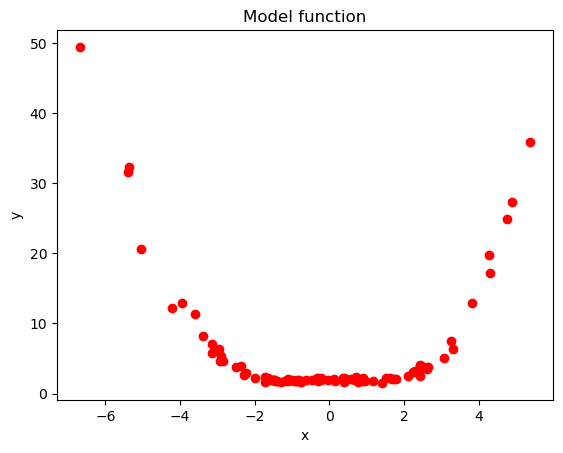

In [20]:
import matplotlib.pyplot as plt
plt.plot(X_noise[:,3],y_noise, "ro")
plt.title("Model function")
plt.xlabel("x")
plt.ylabel("y")

## fit the model

In [23]:
model_noise = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [24]:
model_noise.fit(X, y)

/home/cmcneile/anaconda3/envs/symbol_regress/lib/python3.11/site-packages/pysr/sr.py:1276: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick         score                                          equation  \
	0        0.000000e+00                                          3.981308   
	1        9.846184e-01                                         (x3 * x3)   
	2        2.048252e-01                           ((x3 * 0.8552996) * x3)   
	3        4.913711e-01                             ((x3 * x3) + cos(x3))   
	4        8.008411e-01               ((x3 * x3) + (cos(x3) * 2.4649405))   
	5        1.211887e-07         ((x3 * x3) + (exp(0.90217495) * cos(x3)))   
	6  >>>>  2.741685e+01  (((x3 * x3) + -0.49999997) + (cos(x3) * 2.5382))   
	
	           loss  complexity  
	0  2.166697e+01           1  
	1  3.023914e+00           3  
	2  2.007523e+00           5  
	3  1.228177e+00           6  
	4  2.475478e-01           8  
	5  2.475478e-01           9  
	6  3.066702e-13          10  
]